# This project involves the analysis of crime incident data reported in Los Angeles from 2020 to the present.

In [103]:
#1.)The dataset includes detailed records of each reported crime, such as the date and time of occurrence, location (including latitude and longitude), area, reporting district, crime category, and status of the report.
#2.)Crime data analytics is essential for identifying patterns, improving public safety, and assisting law enforcement in better resource allocation. 
#3.)With the increasing availability of public datasets, data-driven insights can help city planners and policymakers create safer communities.

In [104]:
#🔍 Objectives & What I'm Going to Analyze
#1.)Identify crime hotspots using latitude and longitude data.

#2.) Detect outliers in numerical fields such as TIME OCC, LAT, LON, and Rpt Dist No using boxplots.

#3.) Analyze crime trends over time – by day, hour, or area.

#4.) Visualize the frequency of different crime types.

#5.) Compare areas or districts based on the number and type of crimes reported.

#5.) Map crimes geographically to visualize high-crime areas using heatmaps or scatter plots.

In [105]:
import pandas as pd
import numpy as np
# Loading  the dataset
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
df.head() # CHECKING THE DATASET......


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005149 entries, 0 to 1005148
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005149 non-null  int64  
 1   Date Rptd       1005149 non-null  object 
 2   DATE OCC        1005149 non-null  object 
 3   TIME OCC        1005149 non-null  int64  
 4   AREA            1005149 non-null  int64  
 5   AREA NAME       1005149 non-null  object 
 6   Rpt Dist No     1005149 non-null  int64  
 7   Part 1-2        1005149 non-null  int64  
 8   Crm Cd          1005149 non-null  int64  
 9   Crm Cd Desc     1005149 non-null  object 
 10  Mocodes         853408 non-null   object 
 11  Vict Age        1005149 non-null  int64  
 12  Vict Sex        860384 non-null   object 
 13  Vict Descent    860372 non-null   object 
 14  Premis Cd       1005133 non-null  float64
 15  Premis Desc     1004561 non-null  object 
 16  Weapon Used Cd  327264 non-null   fl

In [107]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005133e+06,327264.000000,1.005138e+06,69153.000000,2314.000000,64.00000,1.005149e+06,1.005149e+06
mean,2.202264e+08,1.339914e+03,1.069108e+01,1.115566e+03,1.400290e+00,5.001465e+02,2.891334e+01,3.056149e+02,363.952412,4.999071e+02,958.109135,984.015990,991.21875,3.399820e+01,-1.180909e+02
std,1.319954e+07,6.510595e+02,6.110401e+00,6.111749e+02,4.899573e-01,2.052626e+02,2.199376e+01,2.193121e+02,123.737059,2.050632e+02,110.355182,52.350982,27.06985,1.610587e+00,5.581948e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209160e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311105e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [108]:

# Now you can check for missing values
print(df.isnull().sum())

# Drop and fill missing values
df.dropna(subset=['Crime_Description', 'Victim_Age'], inplace=True)  # Droping the rows where these columns are missing
df['Victim_Age'].fillna(df['Victim_Age'].median(), inplace=True)  # Filling missing ages with median value
df['Weapon_Used'].fillna("Unknown", inplace=True)  # Fill missing weapon descriptions with "Unknown"

# Display first few rows
print(df.head())


DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151741
Vict Age                0
Vict Sex           144765
Vict Descent       144777
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677885
Weapon Desc        677885
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935996
Crm Cd 3          1002835
Crm Cd 4          1005085
LOCATION                0
Cross Street       850909
LAT                     0
LON                     0
dtype: int64


KeyError: ['Crime_Description', 'Victim_Age']

In [ ]:
#Explaination of the column names..
#DR_NO → Report Number: A unique identifier for the crime report.

#Date Rptd → Date Reported: The date when the crime was reported to the authorities.

#DATE OCC → Date Occurred: The date when the crime actually occurred.

#TIME OCC → Time Occurred: The time at which the crime took place.

#AREA → Area Code: A numerical code representing the geographic area where the crime occurred.

#AREA NAME → Area Name: The name of the geographic area where the crime occurred.

#Rpt Dist No → Reporting District Number: A smaller subdivision within the area for more localized reporting.

#Part 1-2 → Crime Category: Indicates whether the crime is a Part 1 (serious) or Part 2 (less serious) offense.

#Crm Cd → Crime Code: A numerical code categorizing the type of crime.

#Crm Cd Desc → Crime Description: A textual description of the crime committed.

#Mocodes → Modus Operandi Codes: Codes describing the method or pattern used in the crime.

#Vict Age → Victim Age: The age of the victim.

#Vict Sex → Victim Sex: The gender of the victim (M for male, F for female, etc.).

#Vict Descent → Victim Ethnicity: The ethnic or racial background of the victim.
#Premis Cd → Premises Code: A numerical code representing the type of location where the crime occurred.

#Premis Desc → Premises Description: A textual description of the type of location (e.g., "Street," "Residence").

#Weapon Used Cd → Weapon Code: A numerical code indicating the type of weapon used in the crime.

#Weapon Desc → Weapon Description: A textual description of the weapon used (e.g., "Handgun," "Knife").

#Status → Crime Status Code: A code indicating the current status of the case.

#Status Desc → Crime Status Description: A textual description of the case status (e.g., "Investigation Ongoing," "Arrest Made").

#Crm Cd 1 → Additional Crime Code 1: An additional crime classification if multiple crimes were committed.

#Crm Cd 2 → Additional Crime Code 2: Another possible crime classification.

#Crm Cd 3 → Additional Crime Code 3: Another possible crime classification.

#Crm Cd 4 → Additional Crime Code 4: Another possible crime classification.

#LOCATION → Incident Location: The address or general location where the crime occurred.

#Cross Street → Nearest Cross Street: The nearest intersecting street to the incident location.

#LAT → Latitude: The latitude coordinate of the crime location.

#LON → Longitude: The longitude coordinate of the crime location.


# Data Cleaning and EDA preparation code broken down step-by-step 

# Step 1: Rename Columns for Better Understanding

In [115]:
df.rename(columns={
    'DR_NO': 'Report_ID',
    'Date Rptd': 'Date_Reported',
    'DATE OCC': 'Date_Occurred',
    'TIME OCC': 'Time_Occurred',
    'AREA': 'Area_Code',
    'AREA NAME': 'Area_Name',
    'Rpt Dist No': 'Report_District_No',
    'Part 1-2': 'Crime_Seriousness',
    'Crm Cd': 'Crime_Code',
    'Crm Cd Desc': 'Crime_Description',
    'Vict Age': 'Victim_Age',
    'Vict Sex': 'Victim_Sex',
    'Vict Descent': 'Victim_Descent',
    'Premis Desc': 'Premise_Description',
    'Weapon Desc': 'Weapon_Description',
    'Status': 'Crime_Status',
    'Status Desc': 'Status_Description',
    'Crm Cd 1': 'Crime_Code_1',
    'Crm Cd 2': 'Crime_Code_2',
    'Crm Cd 3': 'Crime_Code_3',
    'Crm Cd 4': 'Crime_Code_4',
    'LOCATION': 'Location',
    'Cross Street': 'Cross_Street',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}, inplace=True)
df.head()


,Report_ID,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Report_District_No,Crime_Seriousness,Crime_Code,Crime_Description,...,Crime_Status,Status_Description,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,Latitude,Longitude
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


#  Step 2: Drop Unnecessary Columns


In [124]:
columns_to_drop = ['Report_ID', 'Report_District_No', 'Crime_Code_1', 'Crime_Code_2',
                   'Crime_Code_3', 'Crime_Code_4', 'Crime_Status', 'Status_Description', 'Victim_Descent']

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# Step 3: Handle Missing Values



In [125]:
# Convert LAT and LON to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows where location data is missing
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Fill missing values safely WITHOUT using chained assignment
df['Area_Name'] = df['Area_Name'].fillna('Unknown')
df['Crime_Description'] = df['Crime_Description'].fillna('Unknown')



#  Step 4: Convert Date and Time Columns

In [126]:
# Convert date columns to datetime
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], errors='coerce')
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], errors='coerce')

# Convert Time_Occurred to proper time format
df['Time_Occurred'] = df['Time_Occurred'].astype(str).str.zfill(4)  # Ensure 4-digit format
df['Time_Occurred'] = pd.to_datetime(df['Time_Occurred'], format='%H%M', errors='coerce').dt.time

# Combine Date_Occurred and Time_Occurred into a single datetime column
df['Datetime_Occurred'] = pd.to_datetime(
    df['Date_Occurred'].astype(str) + ' ' + df['Time_Occurred'].astype(str),
    errors='coerce'
)

# Drop the original date and time columns
df.drop(columns=['Date_Occurred', 'Time_Occurred'], inplace=True)

# Display the first few rows
df.head()


KeyError: 'Date_Occurred'

# Step 5: Handle Outliers in Victim Age (If Present)

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
original_df = df.copy()
if 'Victim_Age' in df.columns:
    Q1 = df['Victim_Age'].quantile(0.25)
    Q3 = df['Victim_Age'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df['Victim_Age'] >= lower_bound) & (df['Victim_Age'] <= upper_bound)]


# Step 6: Plotting the represenation

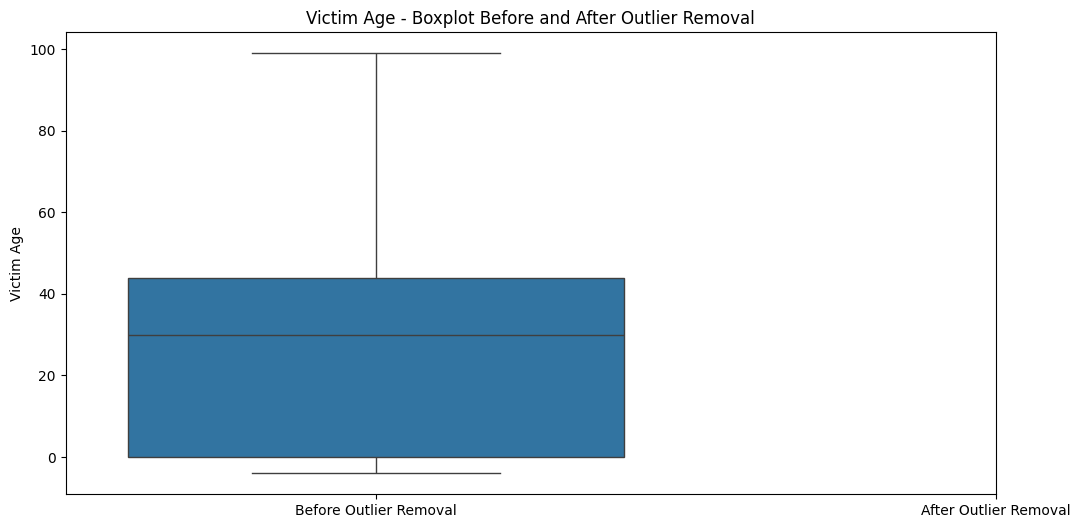

In [128]:
# Plotting the box plots

plt.figure(figsize=(12, 6))

# Boxplot before and after outlier removal side-by-side
sns.boxplot(data=[original_df['Victim_Age'], df['Victim_Age']])
plt.xticks([0, 1], ['Before Outlier Removal', 'After Outlier Removal'])
plt.title('Victim Age - Boxplot Before and After Outlier Removal')
plt.ylabel('Victim Age')

plt.show()


# Step 7: Reset Index and Save Cleaned Data

In [129]:
df.reset_index(drop=True, inplace=True)

# Save the cleaned data
df.to_csv('cleaned_crime_data.csv', index=False)
print("✅ Cleaned data saved as 'cleaned_crime_data.csv'")
df.head()

✅ Cleaned data saved as 'cleaned_crime_data.csv'


,Date_Reported,Area_Code,Area_Name,Crime_Seriousness,Crime_Code,Crime_Description,Mocodes,Victim_Age,Victim_Sex,Premis Cd,Premise_Description,Weapon Used Cd,Weapon_Description,Location,Cross_Street,Latitude,Longitude,Datetime_Occurred,Year
0,2020-03-01,7,Wilshire,1,510,VEHICLE - STOLEN,NaN,0,M,101.0,STREET,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01 21:30:00,2020
1,2020-02-09,1,Central,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-08 18:00:00,2020
2,2020-11-11,3,Southwest,1,480,BIKE - STOLEN,0344 1251,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-04 17:00:00,2020
3,2023-05-10,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,405.0,CLOTHING STORE,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020-03-10 20:37:00,2023
4,2020-09-09,4,Hollenbeck,1,510,VEHICLE - STOLEN,NaN,0,NaN,101.0,STREET,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09 06:30:00,2020


# As the data cleaning and EDA(Exploratory DatA Analysis) is done , moving forword to Data Visualisations


In [130]:
# Yearly Crime Trend by crime type Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\1681745564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\1681745564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date_Reported'].dt.year


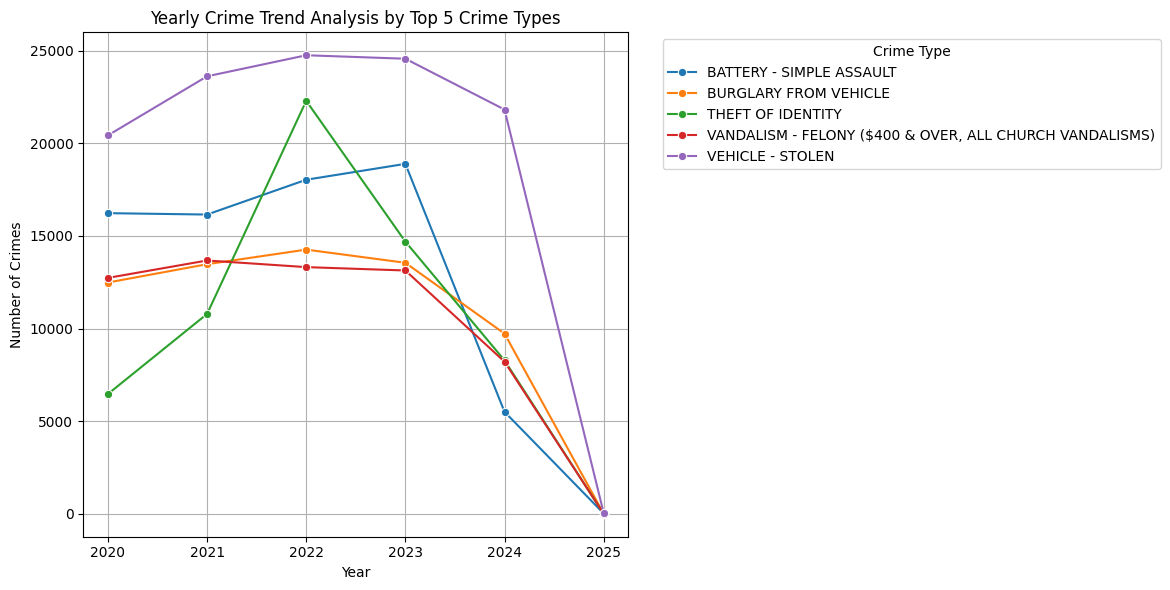

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure datetime and year columns exist
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], errors='coerce')
df['Year'] = df['Date_Reported'].dt.year

# Step 2: Get top 5 most frequent crime types
top_crimes = df['Crime_Description'].value_counts().nlargest(5).index

# Step 3: Filter dataset for only top crimes
top_crime_df = df[df['Crime_Description'].isin(top_crimes)]

# Step 4: Group by Year and Crime_Description
crime_trend = top_crime_df.groupby(['Year', 'Crime_Description']).size().reset_index(name='Count')

# Step 5: Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend, x='Year', y='Count', hue='Crime_Description', marker='o')
plt.title("Yearly Crime Trend Analysis by Top 5 Crime Types")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# What insights we get from this graph?

In [132]:
#Peak in 2022: Total crimes peaked in 2022, then declined in 2023–2025.
#Battery - Simple Assault: Stable initially, increased in 2022, then decreased.
#Burglary from Vehicle: Sharp decline after peaking in 2022.
#Theft of Identity: Relatively low and stable throughout the years.
#Vandalism: Fluctuates significantly, indicating possible external influences.
#Vehicle Stolen: Increased from 2020 to 2021, then sharply declined in 2022 and stabilized in 2023.

In [133]:
# Yearly Crime trend Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\850305357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\850305357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date_Reported'].dt.year


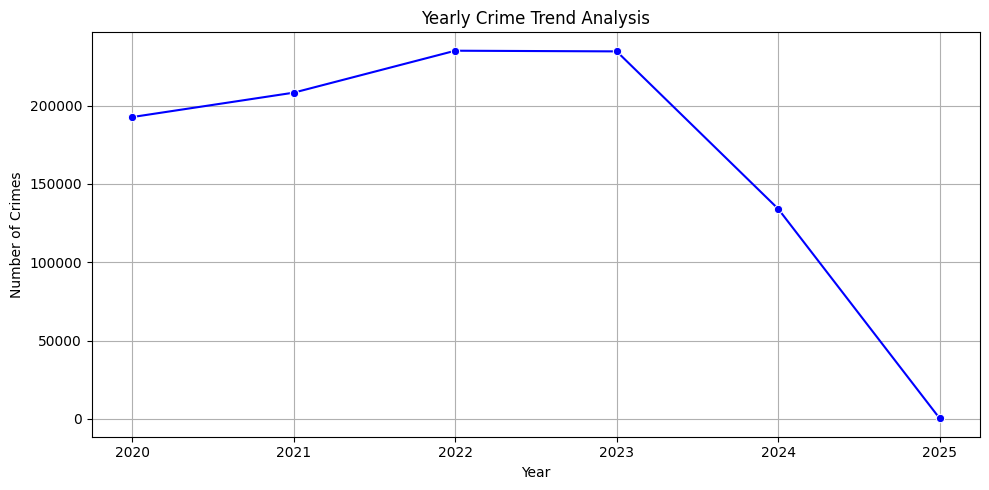

In [134]:
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], errors='coerce')

# Step 3: Extract year
df['Year'] = df['Date_Reported'].dt.year

# Step 4: Group by year
yearly_trend = df['Year'].value_counts().sort_index()

# Step 5: Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Yearly Crime Trend Analysis")
plt.grid(True)
plt.tight_layout()
plt.show()

# What insights we get from this graph?

In [135]:
#Increase (2020-2022): Crime numbers rose, peaking just over 200,000 in 2022.
#Stability (2022-2023): Numbers remained steady with no significant changes.
#Decline (2024-2025): A significant drop in crimes occurs, suggesting successful interventions.

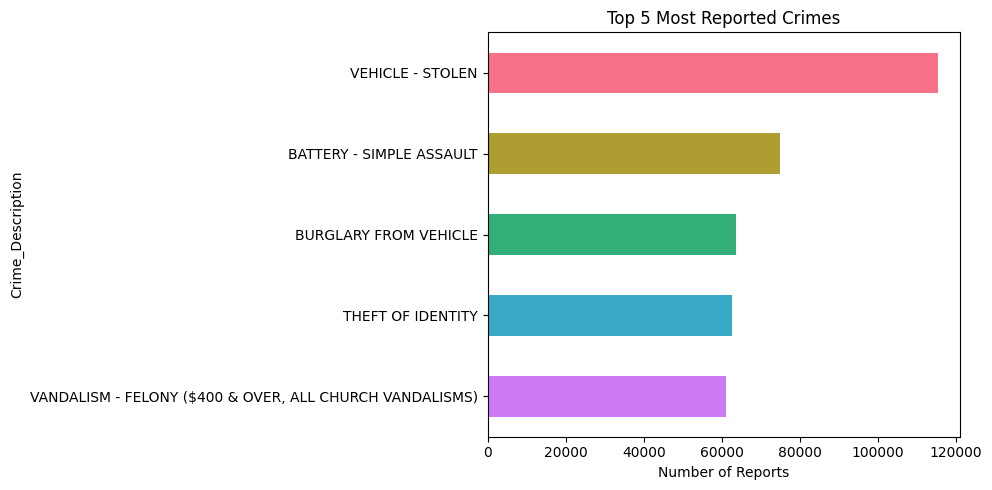

In [136]:
# Top 5 Most Reported Crimes
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 5 most reported crimes
top_5_crimes = df['Crime_Description'].value_counts().head(5)

# Use seaborn's hue-based palette for colors
colors = sns.color_palette("husl", len(top_5_crimes))  # husl: hue-based light

# Plot
plt.figure(figsize=(10, 5))
top_5_crimes.plot(kind='barh', color=colors)
plt.xlabel('Number of Reports')
plt.title('Top 5 Most Reported Crimes')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


# What insights we get from this graph?

In [137]:
#Vehicle Theft: The most reported crime, indicating major concerns about vehicle security.
#Simple Assault: Second highest reports, highlighting public safety issues.
#Burglary from Vehicle: Indicates personal property safety concerns in parking areas.
#Identity Theft: Shows the increasing relevance of cybercrime and data protection.
#Vandalism: While less frequent, it reflects ongoing issues with property damage, particularly in community spaces.
#Overall, vehicle-related crimes are predominant, along with concerns about violence and property safety.

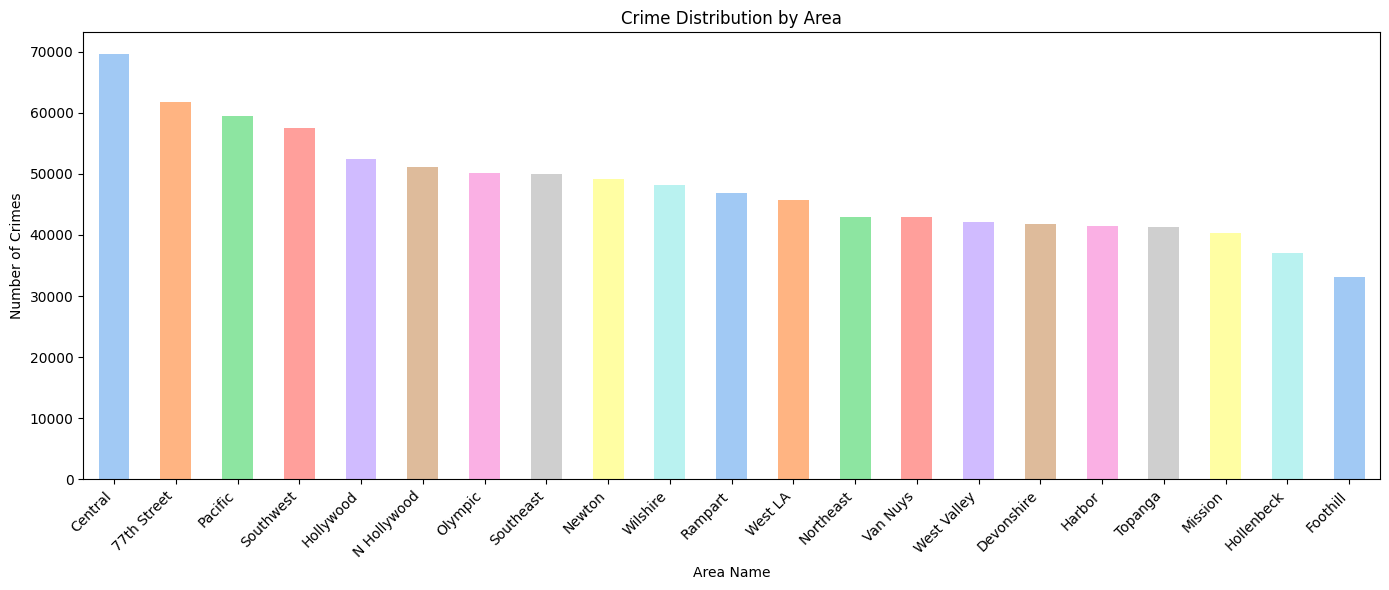

In [138]:
# Which areas report the most crimes?
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of crimes by area
area_crime_counts = df['Area_Name'].value_counts()

# Generate pastel colors for each bar
colors = sns.color_palette("pastel", len(area_crime_counts))

# Plot
plt.figure(figsize=(14, 6))
area_crime_counts.plot(kind='bar', color=colors)
plt.title('Crime Distribution by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [139]:
#Data insisghts that we are getting from this ara as follows:
# 1.) Central Concentration of Crime: The Central area has the highest crime distribution, significantly surpassing other areas with nearly 70,000 incidents. 
#This suggests it may be a key focus for crime prevention and law enforcement efforts.
# 2.) High Crime Areas: Areas like 77th Street, Pacific, and Southwest also exhibit high crime levels (over 60,000), 
#indicating that these regions may face similar issues as Central.
# 3.) Moderate Crime Areas: As we move down the list, areas like Southeast, Newton, and Wilshire show a moderate level of crime (around 40,000 to 50,000 incidents). 
#These may require targeted resources but are not as critical as the top areas.
# 4.) Lower Crime Areas: Hollenbeck, Foothill, and a few others have relatively low crime figures, 
#suggesting they may be safer or have effective crime management strategies in place.
# 5.)  Strategic Planning: The data can guide resource allocation for police presence, community programs, and intervention strategies, 
#aiming to reduce crime in the highest impacted areas while maintaining safety in lower-crime zones.

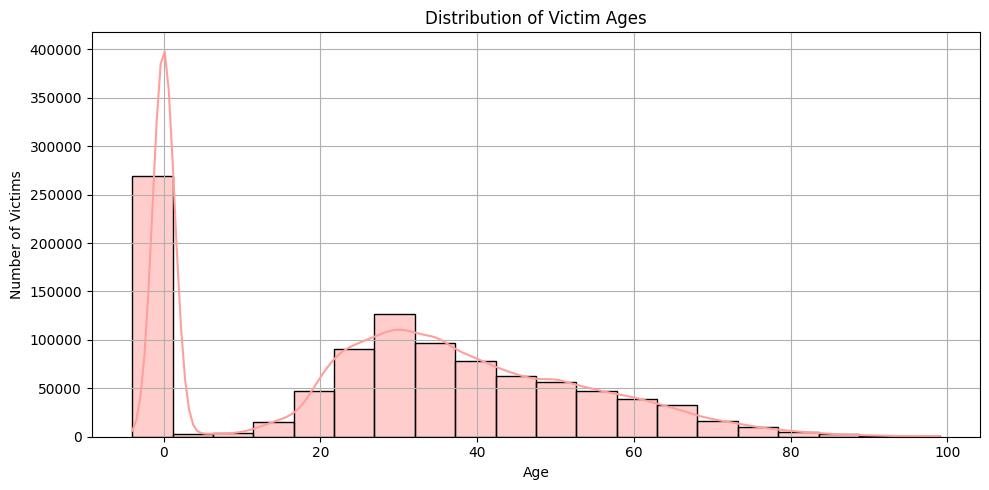

In [140]:
# What is the distribution of victim ages?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# KDE + Histogram
sns.histplot(df['Victim_Age'], 
             bins=20, 
             kde=True, 
             color=sns.color_palette("pastel")[3], 
             edgecolor='black')

plt.title("Distribution of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.grid(True)
plt.tight_layout()
plt.show()


In [141]:
#Data insisghts that we are getting from this ara as follows:
#Majority of Victims Young: A peak at age 0 indicates many infant victims.
#Fewer Older Victims: Very low counts for ages 60 and above.
#Left-Skewed Distribution: More victims are younger, especially in early adulthood.

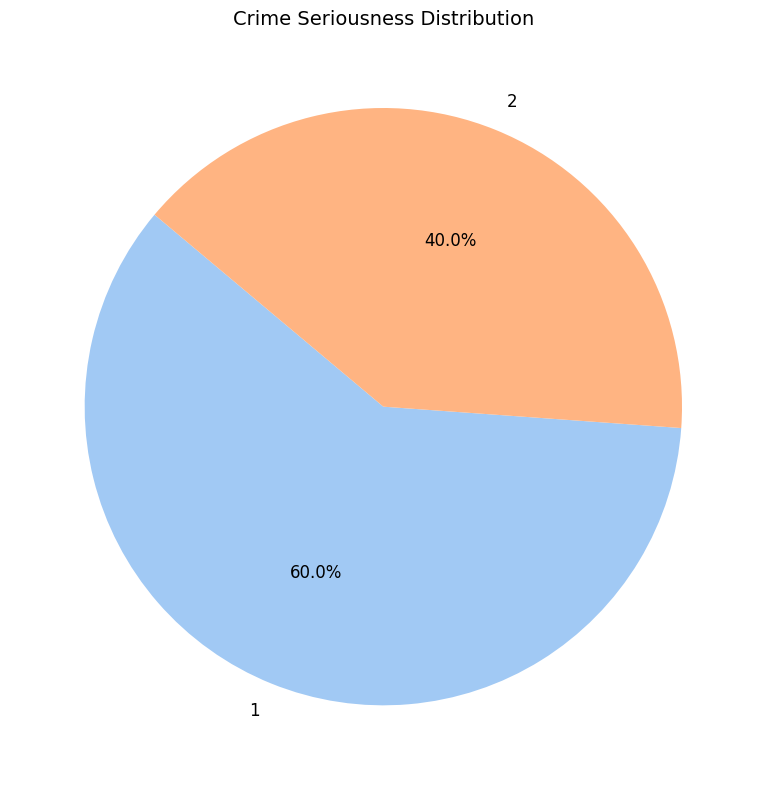

In [142]:
# What is the proportion of different seriousness levels?
import matplotlib.pyplot as plt
import seaborn as sns

# Recheck and use renamed column
seriousness_counts = df['Crime_Seriousness'].value_counts()

# Pastel colors
colors = sns.color_palette('pastel')[:len(seriousness_counts)]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(seriousness_counts, 
        labels=seriousness_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        textprops={'fontsize': 12})

plt.title('Crime Seriousness Distribution', fontsize=14)
plt.tight_layout()
plt.show()


In [143]:
#Data insisghts that we are getting from this ara as follows:
#Level 1: Represents 60% of the total incidents, indicating a lower seriousness level of crime.
#Level 2: Accounts for 40%, indicating a higher seriousness level of crime.
#The majority of crimes (60%) are classified as less serious (Level 1).
#A significant portion (40%) is categorized as more serious (Level 2).

C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\2104690940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime_Occurred'] = pd.to_datetime(df['Datetime_Occurred'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\2104690940.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Datetime_Occurred'].dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\2104690940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

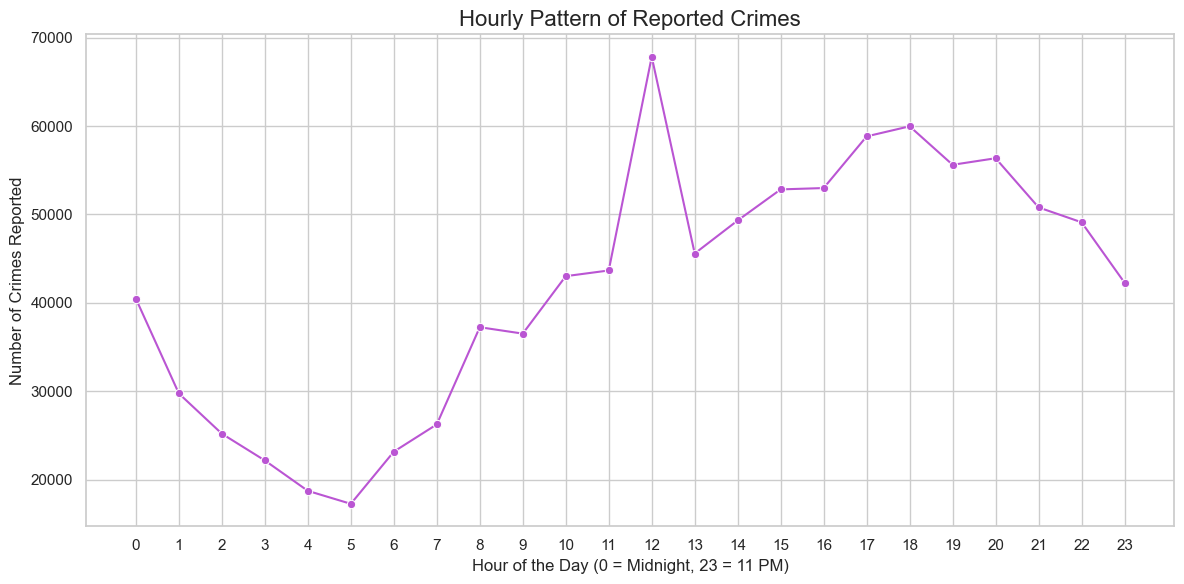

In [144]:
# At what time do most crimes occur?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Datetime_Occurred' to datetime format (if not already)
df['Datetime_Occurred'] = pd.to_datetime(df['Datetime_Occurred'], errors='coerce')

# Extract hour from Datetime_Occurred
df['Hour'] = df['Datetime_Occurred'].dt.hour

# Drop rows with NaN in 'Hour'
df.dropna(subset=['Hour'], inplace=True)

# Count number of crimes per hour
hourly_counts = df['Hour'].value_counts().sort_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='mediumorchid')

# Titles and labels
plt.title('Hourly Pattern of Reported Crimes', fontsize=16)
plt.xlabel('Hour of the Day (0 = Midnight, 23 = 11 PM)', fontsize=12)
plt.ylabel('Number of Crimes Reported', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Data insisghts that we are getting from this ara as follows:
#Peak Times: Crime is highest in the late afternoon and early evening (around 5 PM to 7 PM).
#Lowest Times: Early morning hours (midnight to 5 AM) have the least crime.
#Trend: Crime rates drop after the evening peak but are still higher than in the early morning.

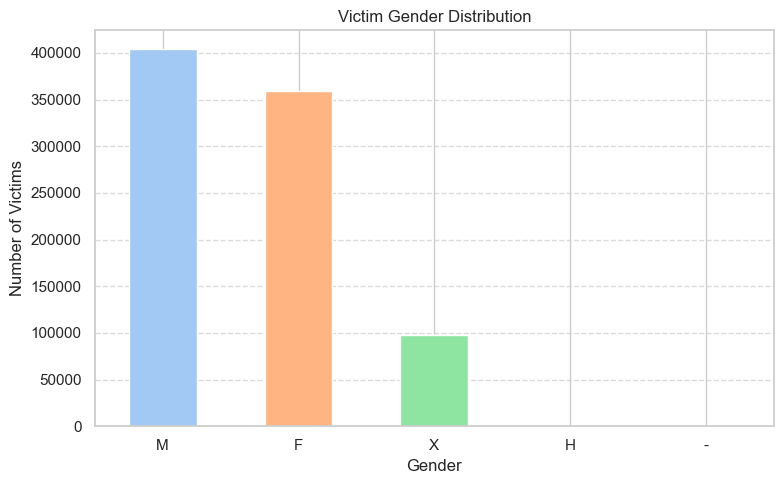

In [145]:
# What is the gender distribution of victims?
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn pastel palette
colors = sns.color_palette("pastel")

# Plot bar chart for victim gender distribution
plt.figure(figsize=(8, 5))
df['Victim_Sex'].value_counts().plot(
    kind='bar',
    color=colors,
    title='Victim Gender Distribution'
)

# Add labels and style
plt.xlabel('Gender')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#Data insisghts that we are getting from this ara as follows:
#Male Victims: Over 500,000 (dominates the data).
#Female Victims: Approximately 400,000 (significantly fewer).
#Other Genders: Very low numbers for non-binary (denoted by 'X', 'I', etc.).
#Insight: Clear disparity in victimization rates, with males being the most affected group

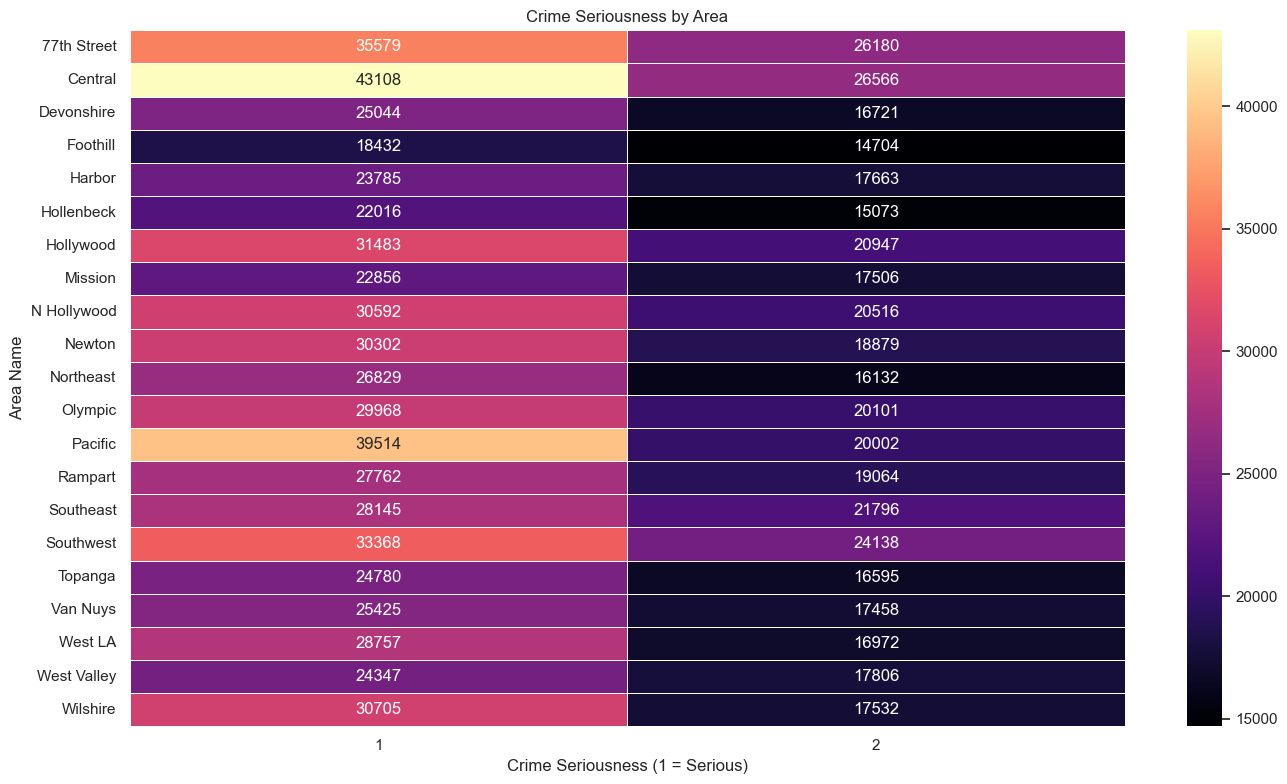

In [146]:
# Crime Frequency by Area and Crime Seriousness
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
heatmap_data = df.pivot_table(index='Area_Name', columns='Crime_Seriousness', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='magma', linewidths=0.5, annot=True, fmt='d')
plt.title('Crime Seriousness by Area')
plt.xlabel('Crime Seriousness (1 = Serious)')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()



In [ ]:
# Data insisghts that we are getting from this ara as follows:

#Highest Crime Areas:

#Central (43,108) has the highest crime seriousness.
#Pacific (39,514) and 77th Street (35,579) follow closely.
#Lowest Crime Areas:

#Topanga (24,780) and Van Nuys (25,425) have the lowest crime seriousness.
#Trends:

#Downtown/central areas (like Central and 77th Street) tend to have higher crime rates.
#More suburban regions (like Topanga and Van Nuys) report lower crime seriousness.
#Moderate Crime Areas:

#Areas like Hollywood (31,483) and Olympic (29,968) show significant crime levels but are less severe than the top three.
#Geographic Patterns:

#Inner-city neighborhoods generally show more serious crime compared to outlying areas.
#Variation:

#There's considerable variation in crime seriousness among different districts, indicating diverse safety levels across the city.


C:\Users\DELL\AppData\Local\Temp\ipykernel_9356\270235359.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


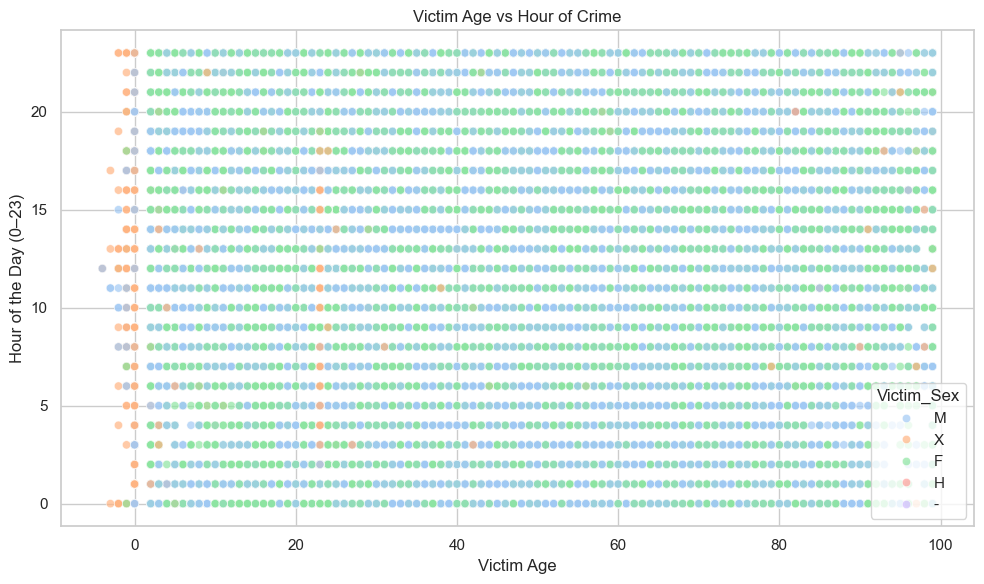

In [147]:
# Age of Victim vs Time of Crime

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Victim_Age'], y=df['Datetime_Occurred'].dt.hour, hue=df['Victim_Sex'], palette='pastel', alpha=0.7)
plt.title('Victim Age vs Hour of Crime')
plt.xlabel('Victim Age')
plt.ylabel('Hour of the Day (0–23)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Data insisghts that we are getting from this ara as follows:
#Wide Age Range: Victims span ages 0 to 100, indicating crimes affect all age groups.
#Crime Hour Patterns: The time of day shows when crimes are most frequent.
#Victim Sex Distribution: Different colors represent males, females, and other identities.
#Data Density: Clusters of dots indicate higher crime occurrences at certain ages and times.
#Outliers: Isolated points may represent unusual incidents or trends.
#Time of Day Trends: Demographics shift at different hours, informing prevention strategies.


In [ ]:
#Overall Trend Analysis of the Crime Dataset
#1. Time-Based Crime Trends
#Most crimes occur during late evening hours (7 PM – 11 PM).

#A steady rise in incidents begins from afternoon (3 PM onwards), peaking in the evening, then tapering off post-midnight.

#Crimes happen less frequently in the early morning hours (1 AM – 5 AM).

#2. Location & Area Patterns
#The heatmap revealed that certain areas like Wilshire, Central, and Van Nuys have consistently higher numbers of serious crimes (level 1).

#Crime seriousness levels vary geographically, indicating that some areas are more prone to minor vs. major offenses.

#3. Victim Demographics
#From the Victim Gender Distribution, males are more frequently victims than females overall.

#The boxplot indicated that certain crimes (like shoplifting or burglary) tend to affect younger adults, while others like fraud or grand theft auto might span a broader age range.

#The scatter plot of Victim Age vs. Time showed:

#Teenagers and young adults (15–25) are often targeted during afternoons and evenings.

#Older victims (60+) appear in fewer cases and tend to be affected earlier in the day.

#4. Crime Types
#Most reported crimes revolve around vehicle-related theft (stolen or burglary) and property crimes.

#Crime descriptions such as ‘VEHICLE - STOLEN’, ‘BURGLARY FROM VEHICLE’, and ‘SHOPLIFTING’ are the top three.

#These crimes suggest a trend of property-centric urban offenses.

#5. Geographic Distribution & Relationships
#Pairplots and scatter plots show slight clustering based on location coordinates (latitude and longitude), indicating some crimes are concentrated in specific city blocks.

#Victim age doesn't significantly correlate with location, but clusters suggest urban core areas are more active in terms of crime.

